## Spain Electricity Machine Learning

#### 1. Importing important data viz. and number manipulation libraries

In [31]:
#number manipulation
import numpy as np
import pandas as pd

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#figure size parameter
#plt.rcParams['figure.figsize'] = [4, 4]

#### 2. Loading the data

we should loading the data into a github repo so that we can all access it

In [32]:
#loading the train dataset and assigning it into the df variable
df = pd.read_csv("./df_train.csv")
#show first 5 rows of the df
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


#### 3. Investigating the data

In [33]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

#### 4. GROUP BY cities

#### 4.1 Seville
*Phelokazi and Dom*

*creating a seville subset*

In [34]:
seville_df = df[['time','Seville_humidity',
                 'Seville_clouds_all', 'Seville_wind_speed',
                'Seville_pressure', 'Seville_rain_1h',
                 'Seville_rain_3h','Seville_weather_id',
                 'Seville_temp_max','Seville_temp',
                 'Valencia_humidity', 'Seville_temp_min',
                 'load_shortfall_3h']]
seville_df.head()

,time,Seville_humidity,Seville_clouds_all,Seville_wind_speed,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Valencia_humidity,Seville_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,74.333333,0.0,3.333333,sp25,0.0,0.0,800.0,274.254667,274.254667,75.666667,274.254667,6715.666667
1,2015-01-01 06:00:00,78.333333,0.0,3.333333,sp25,0.0,0.0,800.0,274.945000,274.945000,71.000000,274.945000,4171.666667
2,2015-01-01 09:00:00,71.333333,0.0,2.666667,sp25,0.0,0.0,800.0,278.792000,278.792000,65.666667,278.792000,4274.666667
3,2015-01-01 12:00:00,65.333333,0.0,4.000000,sp25,0.0,0.0,800.0,285.394000,285.394000,54.000000,285.394000,5075.666667
4,2015-01-01 15:00:00,59.000000,0.0,3.000000,sp25,0.0,0.0,800.0,285.513719,285.513719,58.333333,285.513719,6620.666667


In [35]:
seville_df['Seville_weather_id'].sample(100).head()

4311    800.000000
6582    800.000000
8428    800.000000
1241    801.666667
2447    801.000000
Name: Seville_weather_id, dtype: float64

In [36]:
seville_df.shape

(8763, 13)

In [37]:
seville_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                8763 non-null   object 
 1   Seville_humidity    8763 non-null   float64
 2   Seville_clouds_all  8763 non-null   float64
 3   Seville_wind_speed  8763 non-null   float64
 4   Seville_pressure    8763 non-null   object 
 5   Seville_rain_1h     8763 non-null   float64
 6   Seville_rain_3h     8763 non-null   float64
 7   Seville_weather_id  8763 non-null   float64
 8   Seville_temp_max    8763 non-null   float64
 9   Seville_temp        8763 non-null   float64
 10  Valencia_humidity   8763 non-null   float64
 11  Seville_temp_min    8763 non-null   float64
 12  load_shortfall_3h   8763 non-null   float64
dtypes: float64(11), object(2)
memory usage: 890.1+ KB


In [38]:
seville_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                8763 non-null   object 
 1   Seville_humidity    8763 non-null   float64
 2   Seville_clouds_all  8763 non-null   float64
 3   Seville_wind_speed  8763 non-null   float64
 4   Seville_pressure    8763 non-null   object 
 5   Seville_rain_1h     8763 non-null   float64
 6   Seville_rain_3h     8763 non-null   float64
 7   Seville_weather_id  8763 non-null   float64
 8   Seville_temp_max    8763 non-null   float64
 9   Seville_temp        8763 non-null   float64
 10  Valencia_humidity   8763 non-null   float64
 11  Seville_temp_min    8763 non-null   float64
 12  load_shortfall_3h   8763 non-null   float64
dtypes: float64(11), object(2)
memory usage: 890.1+ KB


In [39]:
seville_df.describe().head(10)

,Seville_humidity,Seville_clouds_all,Seville_wind_speed,Seville_rain_1h,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Valencia_humidity,Seville_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,62.658793,13.714748,2.425045,0.039439,0.000243,774.658818,297.479527,293.978903,65.247727,291.633356,10673.857612
std,22.621226,24.272482,1.672895,0.175857,0.003660,71.940009,8.875812,7.920986,19.262322,8.178220,5218.046404
min,8.333333,0.000000,0.000000,0.000000,0.000000,200.000000,272.063000,272.063000,10.333333,270.150000,-6618.000000
25%,44.333333,0.000000,1.000000,0.000000,0.000000,800.000000,291.312750,288.282917,51.333333,285.816667,7390.333333
50%,65.666667,0.000000,2.000000,0.000000,0.000000,800.000000,297.101667,293.323333,67.000000,290.816667,11114.666667
75%,82.000000,20.000000,3.333333,0.000000,0.000000,800.000000,304.150000,299.620333,81.333333,297.150000,14498.166667
max,100.000000,97.333333,11.666667,3.000000,0.093333,804.000000,320.483333,314.976667,100.000000,314.816667,31904.000000


In [43]:
Seville_df = df[['time', 'Seville_wind_speed',
        'Seville_rain_1h', 
        'Seville_pressure', 'Seville_rain_3h',
        'Seville_weather_id', 'Seville_temp_max', 'Seville_temp',
       'Seville_temp_min', 'load_shortfall_3h']]

Seville_df.head() #first five rows and all columns

,time,Seville_wind_speed,Seville_rain_1h,Seville_pressure,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Seville_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,3.333333,0.0,sp25,0.0,800.0,274.254667,274.254667,274.254667,6715.666667
1,2015-01-01 06:00:00,3.333333,0.0,sp25,0.0,800.0,274.945000,274.945000,274.945000,4171.666667
2,2015-01-01 09:00:00,2.666667,0.0,sp25,0.0,800.0,278.792000,278.792000,278.792000,4274.666667
3,2015-01-01 12:00:00,4.000000,0.0,sp25,0.0,800.0,285.394000,285.394000,285.394000,5075.666667
4,2015-01-01 15:00:00,3.000000,0.0,sp25,0.0,800.0,285.513719,285.513719,285.513719,6620.666667


In [50]:
Seville_wind_df = Seville_df[['Seville_wind_speed',
                 'Seville_pressure','load_shortfall_3h']]

In [51]:
sns.pairplot(Seville_wind_df)

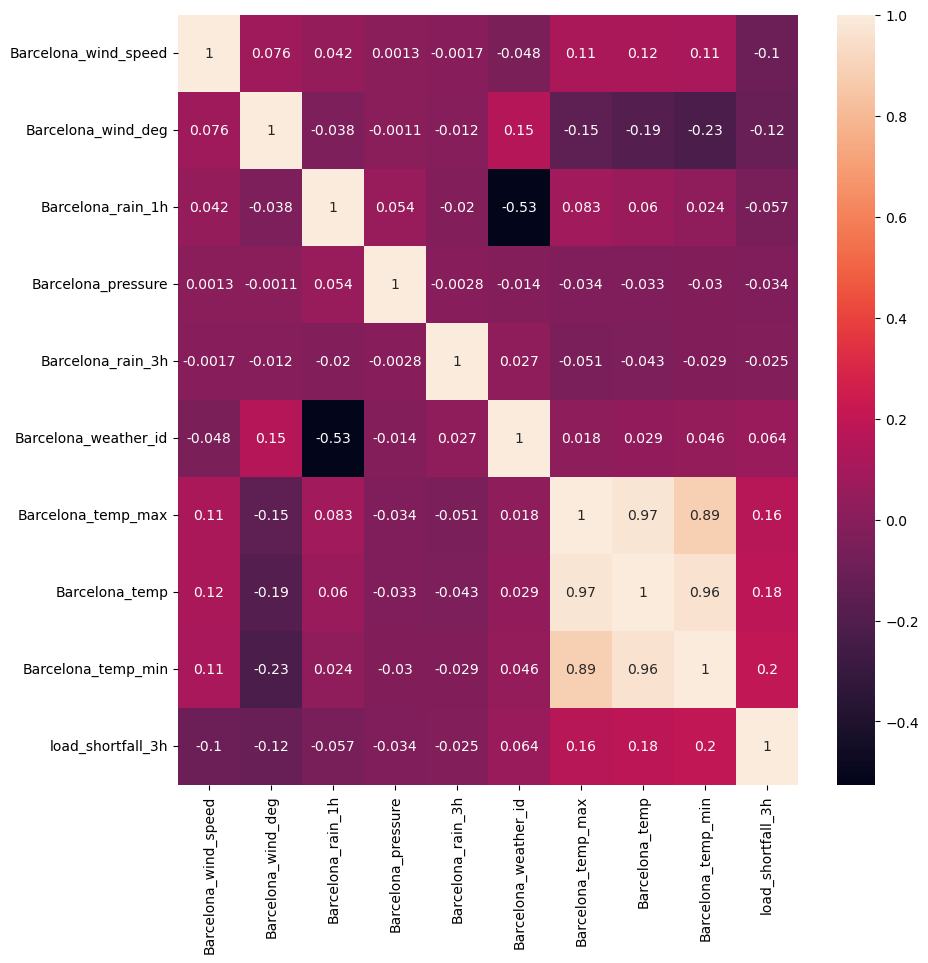

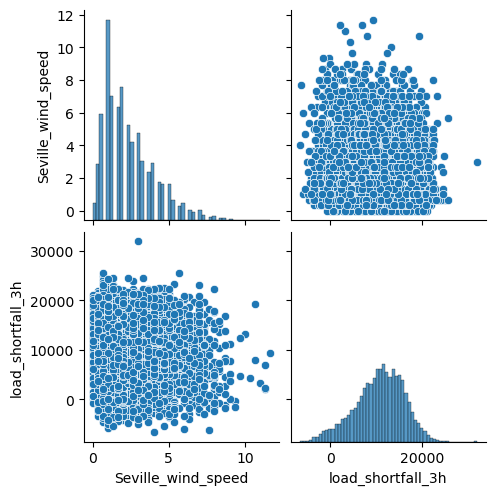

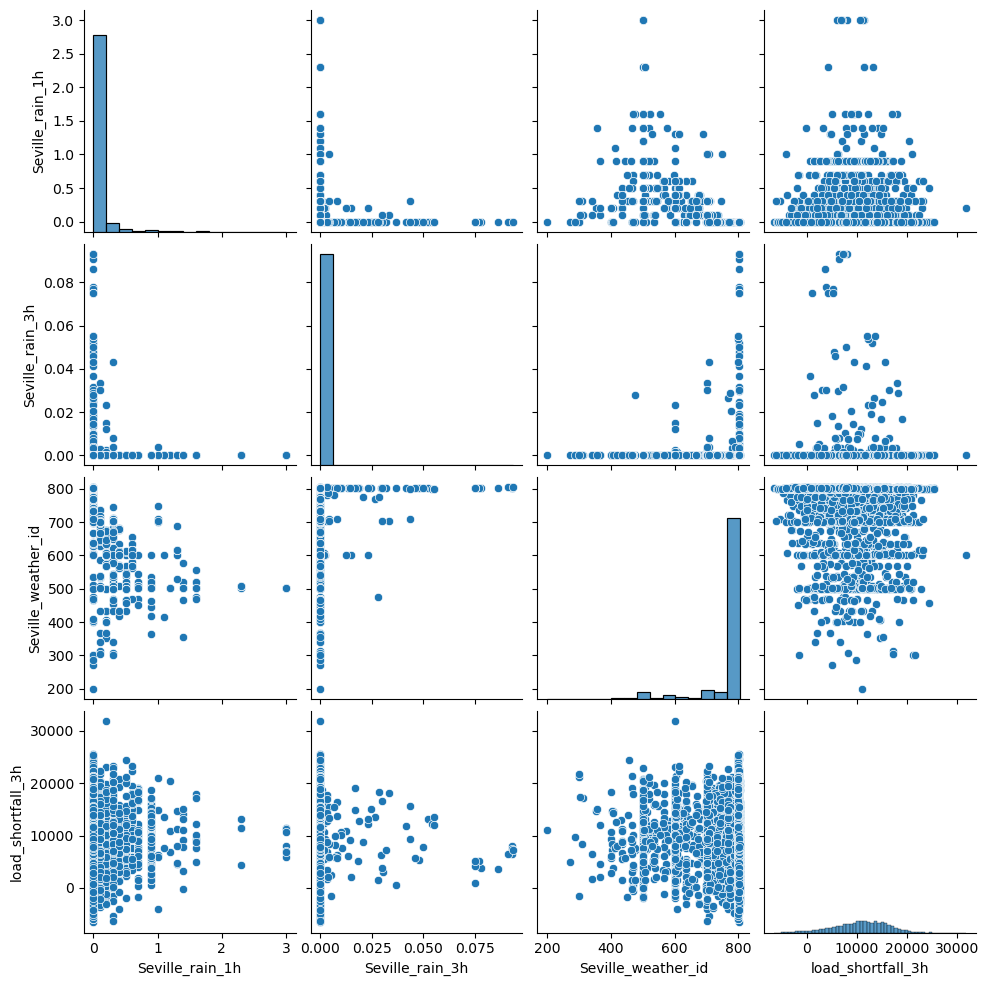

In [52]:
Seville_rain_df =Seville_df[['Seville_rain_1h', 'Seville_rain_3h',
       'Seville_weather_id','load_shortfall_3h']]
sns.pairplot(Seville_rain_df)
plt.show()

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
corrSeville_df = Seville_df.corr()
sns.heatmap(corrSeville_df, annot=True)

<AxesSubplot:>

#### 4.2 Barcelona
*Dumisani*

*creating a subset with the barcelona for a city specific EDA.
will also include the load_shortfall column to see how the city of barcelona 'affects' it*

In [ ]:
barcelona_df = df[['time', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Barcelona_rain_1h', 
        'Barcelona_pressure', 'Barcelona_rain_3h',
        'Barcelona_weather_id', 'Barcelona_temp_max', 'Barcelona_temp',
       'Barcelona_temp_min', 'load_shortfall_3h']]

barcelona_df.head() #first five rows and all columns

,time,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,6.333333,42.666667,0.0,1036.333333,0.0,800.0,281.013000,281.013000,281.013000,6715.666667
1,2015-01-01 06:00:00,4.000000,139.000000,0.0,1037.333333,0.0,800.0,280.561667,280.561667,280.561667,4171.666667
2,2015-01-01 09:00:00,2.000000,326.000000,0.0,1038.000000,0.0,800.0,281.583667,281.583667,281.583667,4274.666667
3,2015-01-01 12:00:00,2.333333,273.000000,0.0,1037.000000,0.0,800.0,283.434104,283.434104,283.434104,5075.666667
4,2015-01-01 15:00:00,4.333333,260.000000,0.0,1035.000000,0.0,800.0,284.213167,284.213167,284.213167,6620.666667


##### 4.2.1 The Shape and Nulls vales

*The shape will show the length and width of the datasets. 
The number of rows vs the numbers of columns. 
We will know if we have a long or wide dataset*

In [ ]:
barcelona_df.shape

(8763, 11)

*Lookinng for null values*

In [ ]:
barcelona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Barcelona_wind_speed  8763 non-null   float64
 2   Barcelona_wind_deg    8763 non-null   float64
 3   Barcelona_rain_1h     8763 non-null   float64
 4   Barcelona_pressure    8763 non-null   float64
 5   Barcelona_rain_3h     8763 non-null   float64
 6   Barcelona_weather_id  8763 non-null   float64
 7   Barcelona_temp_max    8763 non-null   float64
 8   Barcelona_temp        8763 non-null   float64
 9   Barcelona_temp_min    8763 non-null   float64
 10  load_shortfall_3h     8763 non-null   float64
dtypes: float64(10), object(1)
memory usage: 753.2+ KB


*Five number summary of df*

In [ ]:
barcelona_df.describe().head(10)

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.870497,190.544848,0.128906,1.377965e+03,0.000439,765.979687,291.157644,289.855459,288.447422,10673.857612
std,1.792197,89.077337,0.634730,1.407314e+04,0.003994,88.142235,7.273538,6.528111,6.102593,5218.046404
min,0.000000,0.000000,0.000000,6.706667e+02,0.000000,200.666667,272.150000,270.816667,269.483333,-6618.000000
25%,1.666667,118.166667,0.000000,1.014000e+03,0.000000,800.000000,285.483333,284.973443,284.150000,7390.333333
50%,2.666667,200.000000,0.000000,1.018000e+03,0.000000,800.333333,290.150000,289.416667,288.150000,11114.666667
75%,4.000000,260.000000,0.000000,1.022000e+03,0.000000,801.000000,296.855000,294.909000,292.966667,14498.166667
max,12.666667,360.000000,12.000000,1.001411e+06,0.093000,804.000000,314.076667,307.316667,304.816667,31904.000000


**Create a seaborn pairplot**
*Since our data is numeric, we can use a pairplot to compare their relationship agianst each other and most importantly against the **load_shortfall** column*

*creating additional subset.*

Below creating a subset of temp, rain and wind.

In [ ]:
barcelona_wind_df = barcelona_df[['Barcelona_wind_speed',
       'Barcelona_wind_deg', 'load_shortfall_3h']]

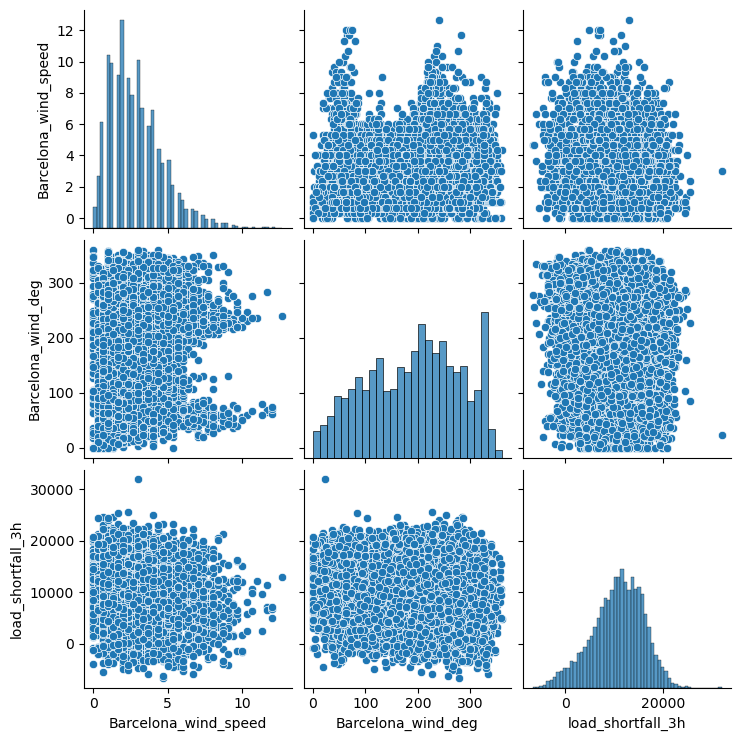

In [ ]:
sns.pairplot(barcelona_wind_df)

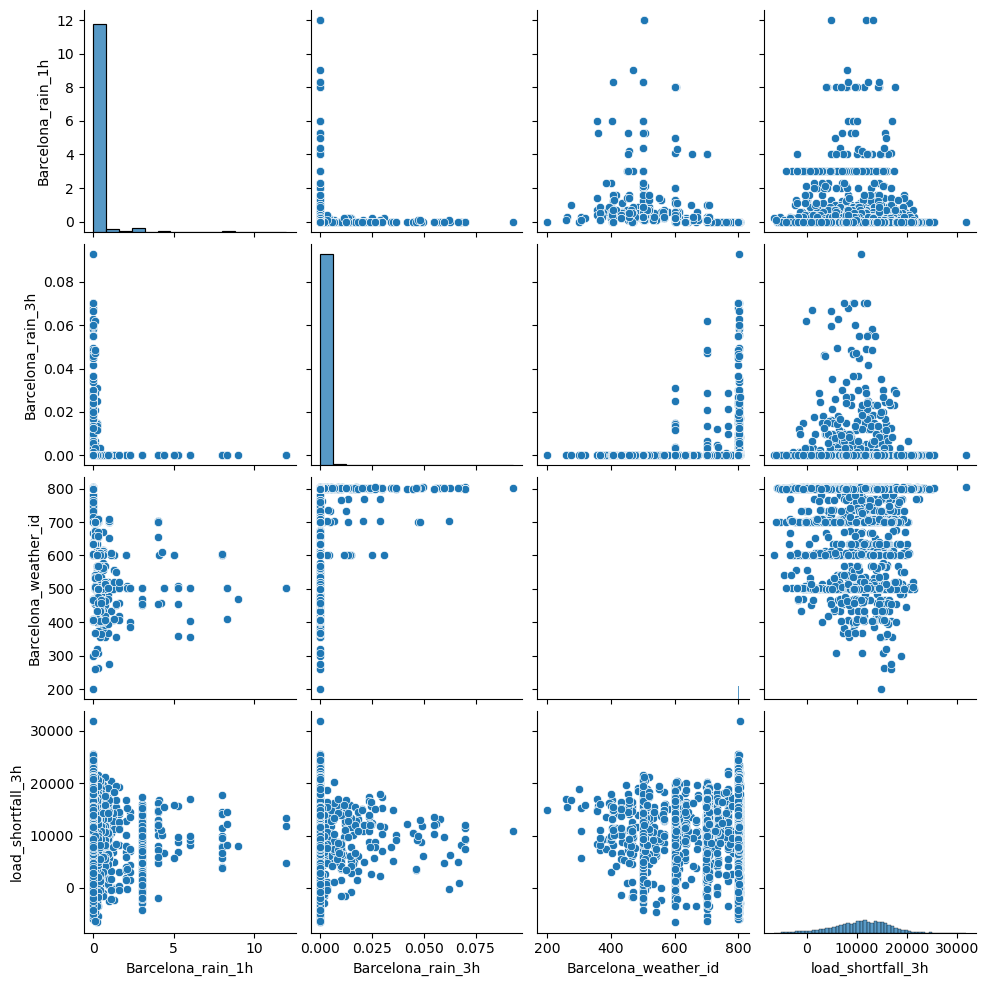

In [ ]:
barcelona_rain_df =barcelona_df[['Barcelona_rain_1h', 'Barcelona_rain_3h',
       'Barcelona_weather_id','load_shortfall_3h']]
sns.pairplot(barcelona_rain_df)
plt.show()

#### using the HEATMAP to assess the correlation

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
corrBarcelona_df = barcelona_df.corr()
sns.heatmap(corrBarcelona_df, annot=True)

<AxesSubplot:>

#### 4.3 Madrid
*Megan*

#### 4.4 Bilbao
*Mojalefa*

#### 4.5 Valencia
*Emmanuel*